# Players in motion
I want to specifically analyse the case where at least one player was in motion 

In [2]:
import sys
import os
import polars as pl
import pandas as pd
import itables

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, "../../", 'src'))

from config import Constants
from preprocessing.preprocessing import BigDataBowlData
from plotting.plotting import PlotPlayVertical
import seaborn as sns

# init_notebook_mode(all_interactive=True)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)


GAMES_FILE = "../../data/games.csv"
PLAYS_FILE = "../../data/plays.csv"
PLAYERS_FILE = "../../data/players.csv"
PLAYER_PLAYS_FILE = "../../data/player_play.csv"

TRACKING_FILES = ["../../data/tracking_week_1.csv",
                  "../../data/tracking_week_2.csv"
                  ]

In [3]:
data = BigDataBowlData(GAMES_FILE, 
                       PLAYS_FILE, 
                       PLAYERS_FILE, 
                       PLAYER_PLAYS_FILE, 
                       TRACKING_FILES)

In [4]:
data.plays_df.collect().head()

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,distanceToEndzone,playType,preSnapPossessionTeamScore,preSnapDefensiveTeamScore,preSnapPossessionTeamWP,preSnapDefensiveTeamWP,possessionTeamWPAdded,defensiveTeamWPAdded,defensiveTeamExpectedPointsAdded,scoreDifference,possessionTeamNumPlayersInMotionAtSnap,possessionTeamNumPlayersShiftSinceLineset,possessionTeamNumPlayersMotionSinceLineset,playerMotionWasTargetted,playerInMotionAtSnapWasTargetted,playHadPlayersInMotionAtSnap,playHadPlayersMotionSinceLineset,playHadPlayersShiftSinceLineset,playhadPlayersMotionOrShiftSinceLineset,playHadMotion,defensiveTeamNumPlayersInMotionAtSnap,defensiveTeamNumPlayersShiftSinceLineset,defensiveTeamNumPlayersMotionSinceLineset
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,i64,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,i64,str,i64,i64,f64,f64,f64,f64,f64,i64,u32,u32,u32,u32,u32,bool,bool,bool,bool,i32,u32,u32,u32
2022102302,2655,"""(1:54) (Shotgun) J.Burrow pass…",3,1,10,"""CIN""","""ATL""","""CIN""",21,"""01:54""",35,17,"""N""",31,0.982017,0.017983,0.719313,"""EMPTY""","""3x2""",10,"""C""","""6""","""36.69""","""16.51""",false,"""TRADITIONAL""","""2.40000009536743""","""INSIDE_BOX""","""2.99""","""2.99000000953674""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",9,9,0.004634,-0.004634,0.702717,true,"""NA""","""NA""",0,"""Cover-3""","""Zone""",2022,7,"""10/23/2022""","""13:00:00""","""CIN""","""ATL""",35,17,79,"""pass""",35,17,0.982017,0.017983,0.004634,-0.004634,-0.702717,18,0,0,0,0,0,false,false,false,false,0,0,0,0
2022091809,3698,"""(2:13) (Shotgun) J.Burrow pass…",4,1,10,"""CIN""","""DAL""","""CIN""",8,"""02:13""",17,17,"""N""",18,0.424356,0.575644,0.607746,"""EMPTY""","""3x2""",9,"""C""","""4""","""20.83""","""20.49""",false,"""TRADITIONAL""","""1.13999998569489""","""INSIDE_BOX""","""1.836""","""1.83599996566772""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",4,4,0.002847,-0.002847,-0.240509,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,2,"""9/18/2022""","""16:25:00""","""DAL""","""CIN""",20,17,92,"""pass""",17,17,0.575644,0.424356,-0.002847,0.002847,0.240509,0,0,0,0,0,0,false,false,false,false,0,0,0,0
2022103004,3146,"""(2:00) (Shotgun) D.Mills pass …",4,3,12,"""HOU""","""TEN""","""HOU""",20,"""02:00""",3,17,"""N""",30,0.006291,0.993709,-0.291485,"""SHOTGUN""","""2x2""",12,"""C""","""-4""","""26.02""","""17.56""",false,"""TRADITIONAL""","""3.20000004768372""","""INSIDE_BOX""","""2.236""","""2.23600006103516""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",6,6,0.000205,-0.000205,-0.21848,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,8,"""10/30/2022""","""16:05:00""","""HOU""","""TEN""",10,17,80,"""pass""",3,17,0.006291,0.993709,0.000205,-0.000205,0.21848,-14,0,1,0,0,0,false,false,true,true,1,0,0,0
2022110610,348,"""(9:28) (Shotgun) P.Mahomes pas…",1,2,10,"""KC""","""TEN""","""TEN""",23,"""09:28""",0,0,"""N""",33,0.884223,0.115777,4.249382,"""SHOTGUN""","""2x2""",11,"""C""","""-6""","""38.95"""

In [5]:
data.plays_df.\
    group_by(["playType", "playHadMotion"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadMotion").\
    collect()

playType,playHadMotion,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,i32,u32,f64,f64,f64,f64
"""pass""",0,4668,-0.021278,-0.203149,-0.000365,-0.000806
"""pass""",1,5068,-0.004449,-0.213565,0.000006,-0.001149
"""run""",0,2493,-0.0519,-0.093374,0.000138,-0.00002
"""run""",1,3895,-0.05712,-0.180181,0.000404,-0.000279


In [6]:
data.plays_df.\
    group_by(["playType", "playHadPlayersInMotionAtSnap"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadPlayersInMotionAtSnap").\
    collect()

playType,playHadPlayersInMotionAtSnap,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,bool,u32,f64,f64,f64,f64
"""pass""",false,7351,-0.032469,-0.225525,-0.00047,-0.001025
"""pass""",true,2385,0.048977,-0.159179,0.000747,-0.000661
"""run""",false,4293,-0.055562,-0.13777,0.000233,-0.000051
"""run""",true,2095,-0.054101,-0.175659,0.000437,-0.000291


In [9]:
data.plays_df.\
    group_by(["playType", "playHadMotion", "playerMotionWasTargetted"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadMotion", "playerMotionWasTargetted").\
    collect()

playType,playHadMotion,playerMotionWasTargetted,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,i32,u32,u32,f64,f64,f64,f64
"""pass""",0,0,4668,-0.021278,-0.203149,-0.000365,-0.000806
"""pass""",1,0,3934,-0.073281,-0.339566,-0.001879,-0.002034
"""pass""",1,1,1134,0.23434,0.030914,0.006544,0.000215
"""run""",0,0,2493,-0.0519,-0.093374,0.000138,-0.00002
"""run""",1,0,3895,-0.05712,-0.180181,0.000404,-0.000279


In [14]:
data.plays_df.\
    filter(pl.col("playType") == "pass").\
    group_by(["playType", "possessionTeam", "playHadMotion", "playerMotionWasTargetted"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "possessionTeam", "playHadMotion", "playerMotionWasTargetted").\
    collect()

playType,possessionTeam,playHadMotion,playerMotionWasTargetted,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,str,i32,u32,u32,f64,f64,f64,f64
"""pass""","""ARI""",0,0,221,0.08143,-0.107507,-0.000128,-0.000155
"""pass""","""ARI""",1,0,116,-0.339048,-0.466223,-0.006019,-0.005117
"""pass""","""ARI""",1,1,38,0.281213,-0.10076,0.009467,0.000085
"""pass""","""ATL""",0,0,77,0.078379,-0.215212,0.002856,-0.000855
"""pass""","""ATL""",1,0,124,-0.109469,-0.15884,-0.004194,-0.000669
"""pass""","""ATL""",1,1,36,0.288094,0.339796,0.015752,0.000193
"""pass""","""BAL""",0,0,86,-0.184834,-0.184646,-0.001428,-0.002396
"""pass""","""BAL""",1,0,170,0.102346,-0.159215,0.001511,-0.000627
"""pass""","""BAL""",1,1,27,0.012811,-0.263484,0.002986,-0.000137


In [12]:
data.plays_df.collect().head()

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,distanceToEndzone,playType,preSnapPossessionTeamScore,preSnapDefensiveTeamScore,preSnapPossessionTeamWP,preSnapDefensiveTeamWP,possessionTeamWPAdded,defensiveTeamWPAdded,defensiveTeamExpectedPointsAdded,scoreDifference,possessionTeamNumPlayersInMotionAtSnap,possessionTeamNumPlayersShiftSinceLineset,possessionTeamNumPlayersMotionSinceLineset,playerMotionWasTargetted,playerInMotionAtSnapWasTargetted,playHadPlayersInMotionAtSnap,playHadPlayersMotionSinceLineset,playHadPlayersShiftSinceLineset,playhadPlayersMotionOrShiftSinceLineset,playHadMotion,defensiveTeamNumPlayersInMotionAtSnap,defensiveTeamNumPlayersShiftSinceLineset,defensiveTeamNumPlayersMotionSinceLineset
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,i64,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,i64,str,i64,i64,f64,f64,f64,f64,f64,i64,u32,u32,u32,u32,u32,bool,bool,bool,bool,i32,u32,u32,u32
2022102302,2655,"""(1:54) (Shotgun) J.Burrow pass…",3,1,10,"""CIN""","""ATL""","""CIN""",21,"""01:54""",35,17,"""N""",31,0.982017,0.017983,0.719313,"""EMPTY""","""3x2""",10,"""C""","""6""","""36.69""","""16.51""",false,"""TRADITIONAL""","""2.40000009536743""","""INSIDE_BOX""","""2.99""","""2.99000000953674""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",9,9,0.004634,-0.004634,0.702717,true,"""NA""","""NA""",0,"""Cover-3""","""Zone""",2022,7,"""10/23/2022""","""13:00:00""","""CIN""","""ATL""",35,17,79,"""pass""",35,17,0.982017,0.017983,0.004634,-0.004634,-0.702717,18,0,0,0,0,0,false,false,false,false,0,0,0,0
2022091809,3698,"""(2:13) (Shotgun) J.Burrow pass…",4,1,10,"""CIN""","""DAL""","""CIN""",8,"""02:13""",17,17,"""N""",18,0.424356,0.575644,0.607746,"""EMPTY""","""3x2""",9,"""C""","""4""","""20.83""","""20.49""",false,"""TRADITIONAL""","""1.13999998569489""","""INSIDE_BOX""","""1.836""","""1.83599996566772""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",4,4,0.002847,-0.002847,-0.240509,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,2,"""9/18/2022""","""16:25:00""","""DAL""","""CIN""",20,17,92,"""pass""",17,17,0.575644,0.424356,-0.002847,0.002847,0.240509,0,0,0,0,0,0,false,false,false,false,0,0,0,0
2022103004,3146,"""(2:00) (Shotgun) D.Mills pass …",4,3,12,"""HOU""","""TEN""","""HOU""",20,"""02:00""",3,17,"""N""",30,0.006291,0.993709,-0.291485,"""SHOTGUN""","""2x2""",12,"""C""","""-4""","""26.02""","""17.56""",false,"""TRADITIONAL""","""3.20000004768372""","""INSIDE_BOX""","""2.236""","""2.23600006103516""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",6,6,0.000205,-0.000205,-0.21848,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,8,"""10/30/2022""","""16:05:00""","""HOU""","""TEN""",10,17,80,"""pass""",3,17,0.006291,0.993709,0.000205,-0.000205,0.21848,-14,0,1,0,0,0,false,false,true,true,1,0,0,0
2022110610,348,"""(9:28) (Shotgun) P.Mahomes pas…",1,2,10,"""KC""","""TEN""","""TEN""",23,"""09:28""",0,0,"""N""",33,0.884223,0.115777,4.249382,"""SHOTGUN""","""2x2""",11,"""C""","""-6""","""38.95"""

In [8]:
data.plays_df.\
    filter(pl.col("playType") == "pass").\
    group_by(["playType", "playHadMotion", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadMotion", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted").\
    collect()

playType,playHadMotion,playHadPlayersInMotionAtSnap,playerMotionWasTargetted,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,i32,bool,u32,u32,f64,f64,f64,f64
"""pass""",0,false,0,4668,-0.021278,-0.203149,-0.000365,-0.000806
"""pass""",1,false,0,2144,-0.121665,-0.37416,-0.002262,-0.002743
"""pass""",1,false,1,539,0.225404,0.030542,0.005746,0.000156
"""pass""",1,true,0,1790,-0.015328,-0.233585,-0.001421,-0.001467
"""pass""",1,true,1,595,0.242434,0.031221,0.007268,0.000274


In [9]:
data.plays_df.\
    group_by(["playType", "playHadPlayersInMotionAtSnap", "passResult"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "passResult", "playHadPlayersInMotionAtSnap").\
    collect()

playType,playHadPlayersInMotionAtSnap,passResult,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,bool,str,u32,f64,f64,f64,f64
"""pass""",false,"""C""",4153,0.782185,0.659443,0.018981,0.008208
"""pass""",true,"""C""",1471,0.738487,0.729793,0.016851,0.010325
"""pass""",false,"""I""",2261,-0.902816,-0.736874,-0.022294,-0.015186
"""pass""",true,"""I""",650,-0.87339,-0.739648,-0.021503,-0.015063
"""pass""",false,"""IN""",150,-4.63966,-4.534073,-0.105222,-0.092351
"""pass""",true,"""IN""",43,-4.732266,-4.70269,-0.111654,-0.093975
"""pass""",false,"""R""",312,0.483208,0.188677,0.014576,0.002211
"""pass""",true,"""R""",88,0.523348,0.349532,0.014375,0.003083
"""pass""",false,"""S""",475,-1.896084,-1.688183,-0.043456,-0.037315


In [23]:
print("Play had no players in motion at snap")
data.plays_df.\
    filter((pl.col("playHadPlayersInMotionAtSnap") == False) & (pl.col("playType") == "pass")).\
    group_by(["playType", "playHadPlayersInMotionAtSnap", "passResult"]).\
    agg(count=pl.count("playId"), avg_epa_added=pl.mean("expectedPointsAdded")).\
    with_columns(percentage=pl.col("count") / pl.sum("count")).\
    sort("passResult").\
    collect()

Play had no players in motion at snap


playType,playHadPlayersInMotionAtSnap,passResult,count,avg_epa_added,percentage
str,bool,str,u32,f64,f64
"""pass""",false,"""C""",4153,0.782185,0.564957
"""pass""",false,"""I""",2261,-0.902816,0.307577
"""pass""",false,"""IN""",150,-4.63966,0.020405
"""pass""",false,"""R""",312,0.483208,0.042443
"""pass""",false,"""S""",475,-1.896084,0.064617


In [24]:
print("Play had at least one player in motion at snap")
data.plays_df.\
    filter((pl.col("playHadPlayersInMotionAtSnap") == True) & (pl.col("playType") == "pass")).\
    group_by(["playType", "playHadPlayersInMotionAtSnap", "passResult"]).\
    agg(count=pl.count("playId"), avg_epa_added=pl.mean("expectedPointsAdded")).\
    with_columns(percentage=pl.col("count") / pl.sum("count")).\
    sort("passResult").\
    collect()

Play had at least one player in motion at snap


playType,playHadPlayersInMotionAtSnap,passResult,count,avg_epa_added,percentage
str,bool,str,u32,f64,f64
"""pass""",true,"""C""",1471,0.738487,0.616771
"""pass""",true,"""I""",650,-0.87339,0.272537
"""pass""",true,"""IN""",43,-4.732266,0.018029
"""pass""",true,"""R""",88,0.523348,0.036897
"""pass""",true,"""S""",133,-1.837351,0.055765


In [26]:
# How often is player in motion targeted
data.plays_df.\
    group_by(["playType", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted").\
    collect()

playType,playHadPlayersInMotionAtSnap,playerMotionWasTargetted,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,bool,u32,u32,f64,f64,f64,f64
"""pass""",false,0,6812,-0.052874,-0.25013,-0.000962,-0.001217
"""pass""",false,1,539,0.225404,0.030542,0.005746,0.000156
"""pass""",true,0,1790,-0.015328,-0.233585,-0.001421,-0.001467
"""pass""",true,1,595,0.242434,0.031221,0.007268,0.000274
"""run""",false,0,4293,-0.055562,-0.13777,0.000233,-0.000051
"""run""",true,0,2095,-0.054101,-0.175659,0.000437,-0.000291


In [29]:
# How often is player in motion targeted
data.plays_df.\
    filter(pl.col("playType") == "pass").\
    group_by(["playType", "playHadMotion", "playHadPlayersInMotionAtSnap"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadMotion", "playHadPlayersInMotionAtSnap").\
    collect()

playType,playHadMotion,playHadPlayersInMotionAtSnap,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,i32,bool,u32,f64,f64,f64,f64
"""pass""",0,false,4668,-0.021278,-0.203149,-0.000365,-0.000806
"""pass""",1,false,2683,-0.05194,-0.290739,-0.000653,-0.001645
"""pass""",1,true,2385,0.048977,-0.159179,0.000747,-0.000661


In [35]:
# How often is player in motion targeted
data.plays_df.\
    filter(pl.col("playType") == "pass").\
    group_by(["playType", "playHadMotion", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted", "passResult"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("playType", "playHadMotion", "playHadPlayersInMotionAtSnap", "playerMotionWasTargetted", "passResult").\
    collect().filter(pl.col("passResult") == "C")

playType,playHadMotion,playHadPlayersInMotionAtSnap,playerMotionWasTargetted,passResult,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,i32,bool,u32,str,u32,f64,f64,f64,f64
"""pass""",0,false,0,"""C""",2670,0.742905,0.585727,0.017784,0.006632
"""pass""",1,false,0,"""C""",1058,0.957567,0.861919,0.023481,0.014389
"""pass""",1,false,1,"""C""",425,0.592352,0.535469,0.015295,0.00464
"""pass""",1,true,0,"""C""",1004,0.794164,0.770019,0.017173,0.011069
"""pass""",1,true,1,"""C""",467,0.618788,0.624007,0.016159,0.007814


<Axes: xlabel='expectedPointsAdded', ylabel='Density'>

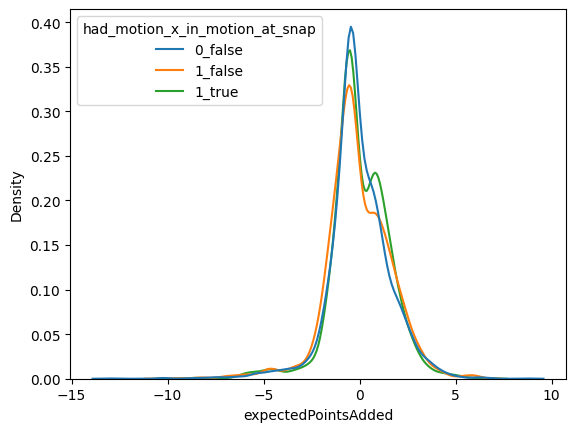

In [44]:
plot_df = data.plays_df.\
    filter(pl.col("playType") == "pass").\
    with_columns(had_motion_x_in_motion_at_snap=pl.col("playHadMotion").cast(pl.String) + "_" + pl.col("playHadPlayersInMotionAtSnap").cast(pl.String))


sns.kdeplot(data=plot_df.collect(), x="expectedPointsAdded", hue="had_motion_x_in_motion_at_snap", common_norm=False)

<Axes: xlabel='expectedPointsAdded', ylabel='had_motion_x_in_motion_at_snap'>

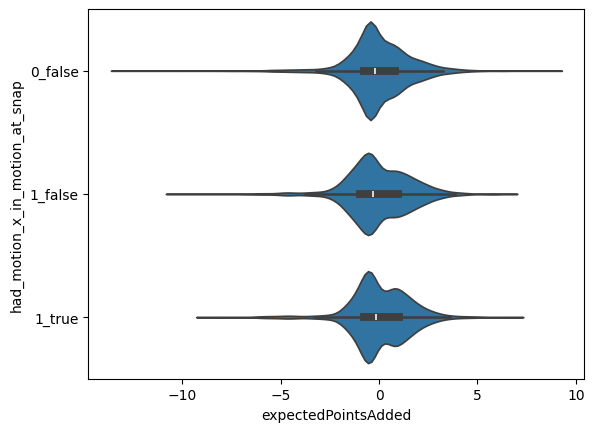

In [45]:
sns.violinplot(data=plot_df.collect(), x="expectedPointsAdded", y="had_motion_x_in_motion_at_snap")

<Axes: xlabel='expectedPointsAdded', ylabel='had_motion_x_in_motion_at_snap'>

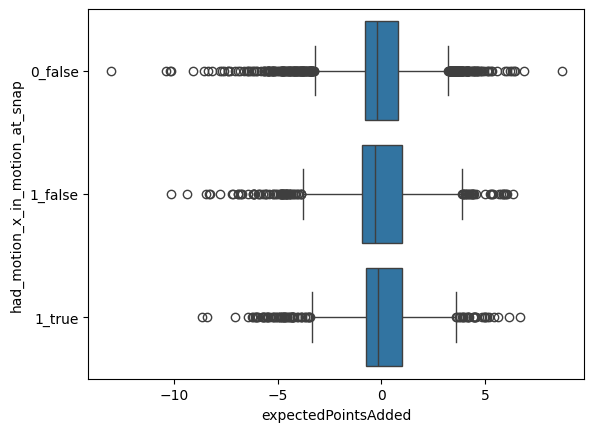

In [46]:
sns.boxplot(data=plot_df.collect(), x="expectedPointsAdded", y="had_motion_x_in_motion_at_snap")

In [43]:
# How often is player in motion targeted
data.plays_df.\
    filter(pl.col("playType") == "pass").\
    group_by(["playType", "playHadPlayersInMotionAtSnap", "possessionTeam"]).\
        agg(count=pl.count("playId"), 
            avg_epa_added=pl.mean("expectedPointsAdded"), 
            median_epa_added = pl.median("expectedPointsAdded"),
            avg_wp_added = pl.mean("possessionTeamWPAdded"),
            median_wp_added = pl.median("possessionTeamWPAdded")).\
    sort("avg_epa_added", descending=True).\
    collect()

playType,playHadPlayersInMotionAtSnap,possessionTeam,count,avg_epa_added,median_epa_added,avg_wp_added,median_wp_added
str,bool,str,u32,f64,f64,f64,f64
"""pass""",true,"""KC""",176,0.427485,0.425585,0.007388,0.004317
"""pass""",true,"""CLE""",48,0.422613,-0.036226,0.011622,-0.001214
"""pass""",true,"""BUF""",95,0.355613,0.362669,0.004944,0.000613
"""pass""",true,"""NO""",28,0.32176,0.185622,0.006932,-0.001521
"""pass""",false,"""PHI""",224,0.281573,-0.053381,0.005351,0.000448
"""pass""",false,"""MIA""",169,0.2106,-0.045602,0.006755,-0.000071
"""pass""",true,"""DET""",71,0.205859,-0.172538,0.004002,-0.000255
"""pass""",true,"""LA""",79,0.200916,0.171486,0.003524,0.00114
"""pass""",true,"""SEA""",55,0.172405,0.449609,0.007855,0.012387


In [39]:
data.plays_df.collect().head()

gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,distanceToEndzone,playType,preSnapPossessionTeamScore,preSnapDefensiveTeamScore,preSnapPossessionTeamWP,preSnapDefensiveTeamWP,possessionTeamWPAdded,defensiveTeamWPAdded,defensiveTeamExpectedPointsAdded,scoreDifference,possessionTeamNumPlayersInMotionAtSnap,possessionTeamNumPlayersShiftSinceLineset,possessionTeamNumPlayersMotionSinceLineset,playerMotionWasTargetted,playerInMotionAtSnapWasTargetted,playHadPlayersInMotionAtSnap,playHadPlayersMotionSinceLineset,playHadPlayersShiftSinceLineset,playhadPlayersMotionOrShiftSinceLineset,playHadMotion,defensiveTeamNumPlayersInMotionAtSnap,defensiveTeamNumPlayersShiftSinceLineset,defensiveTeamNumPlayersMotionSinceLineset
i64,i64,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,f64,f64,f64,str,str,i64,str,str,str,str,bool,str,str,str,str,str,str,str,str,str,i64,str,str,str,i64,i64,f64,f64,f64,bool,str,str,i64,str,str,i64,i64,str,str,str,str,i64,i64,i64,str,i64,i64,f64,f64,f64,f64,f64,i64,u32,u32,u32,u32,u32,bool,bool,bool,bool,i32,u32,u32,u32
2022102302,2655,"""(1:54) (Shotgun) J.Burrow pass…",3,1,10,"""CIN""","""ATL""","""CIN""",21,"""01:54""",35,17,"""N""",31,0.982017,0.017983,0.719313,"""EMPTY""","""3x2""",10,"""C""","""6""","""36.69""","""16.51""",false,"""TRADITIONAL""","""2.40000009536743""","""INSIDE_BOX""","""2.99""","""2.99000000953674""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",9,9,0.004634,-0.004634,0.702717,true,"""NA""","""NA""",0,"""Cover-3""","""Zone""",2022,7,"""10/23/2022""","""13:00:00""","""CIN""","""ATL""",35,17,79,"""pass""",35,17,0.982017,0.017983,0.004634,-0.004634,-0.702717,18,0,0,0,0,0,false,false,false,false,0,0,0,0
2022091809,3698,"""(2:13) (Shotgun) J.Burrow pass…",4,1,10,"""CIN""","""DAL""","""CIN""",8,"""02:13""",17,17,"""N""",18,0.424356,0.575644,0.607746,"""EMPTY""","""3x2""",9,"""C""","""4""","""20.83""","""20.49""",false,"""TRADITIONAL""","""1.13999998569489""","""INSIDE_BOX""","""1.836""","""1.83599996566772""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",4,4,0.002847,-0.002847,-0.240509,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,2,"""9/18/2022""","""16:25:00""","""DAL""","""CIN""",20,17,92,"""pass""",17,17,0.575644,0.424356,-0.002847,0.002847,0.240509,0,0,0,0,0,0,false,false,false,false,0,0,0,0
2022103004,3146,"""(2:00) (Shotgun) D.Mills pass …",4,3,12,"""HOU""","""TEN""","""HOU""",20,"""02:00""",3,17,"""N""",30,0.006291,0.993709,-0.291485,"""SHOTGUN""","""2x2""",12,"""C""","""-4""","""26.02""","""17.56""",false,"""TRADITIONAL""","""3.20000004768372""","""INSIDE_BOX""","""2.236""","""2.23600006103516""","""NA""","""FALSE""","""FALSE""","""FALSE""",0,"""NA""","""NA""","""NA""",6,6,0.000205,-0.000205,-0.21848,true,"""NA""","""NA""",0,"""Quarters""","""Zone""",2022,8,"""10/30/2022""","""16:05:00""","""HOU""","""TEN""",10,17,80,"""pass""",3,17,0.006291,0.993709,0.000205,-0.000205,0.21848,-14,0,1,0,0,0,false,false,true,true,1,0,0,0
2022110610,348,"""(9:28) (Shotgun) P.Mahomes pas…",1,2,10,"""KC""","""TEN""","""TEN""",23,"""09:28""",0,0,"""N""",33,0.884223,0.115777,4.249382,"""SHOTGUN""","""2x2""",11,"""C""","""-6""","""38.95"""